<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK NO 3 REDUCED

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition # for PCA
import imageio # here only for reading images

In [103]:
np.set_printoptions(suppress=True)

## PCA: Color to grayscale

In [105]:
img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nuclei1b.jpg')
img_number = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nr42.png')
img_cat = imageio.v3.imread('Alleycat2.bmp')

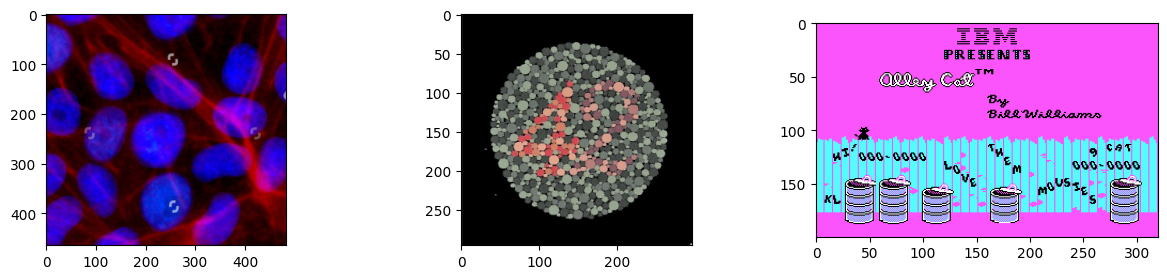

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(img_nuclei)
ax2.imshow(img_number)
ax3.imshow(img_cat)
plt.show()

In [122]:
def process_image(input_image):
    h, w, _ = input_image.shape
    M = input_image.reshape((h*w,3))
    pca = decomposition.PCA(n_components=3)
    M_transformed = pca.fit_transform(M)

    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    for i in range(3):
        axes[i].imshow(M_transformed[:,i].reshape((h, w)), cmap="Greys_r")
        axes[i].set_title(f"$p_{i+1} = ${np.array2string(pca.components_[i], precision=3)}")
    plt.show()

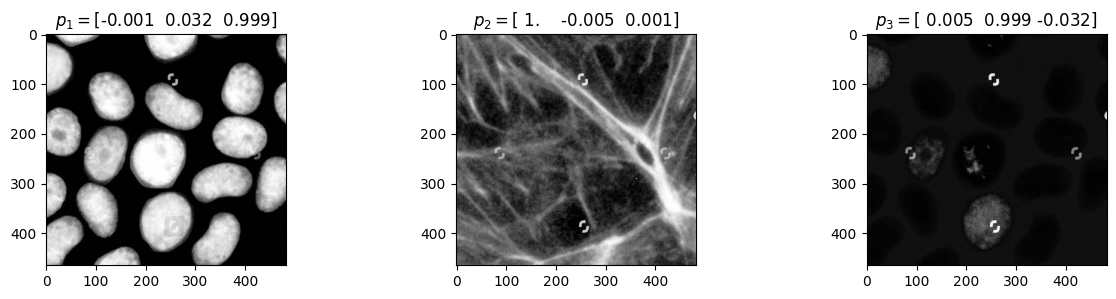

In [123]:
process_image(img_nuclei)

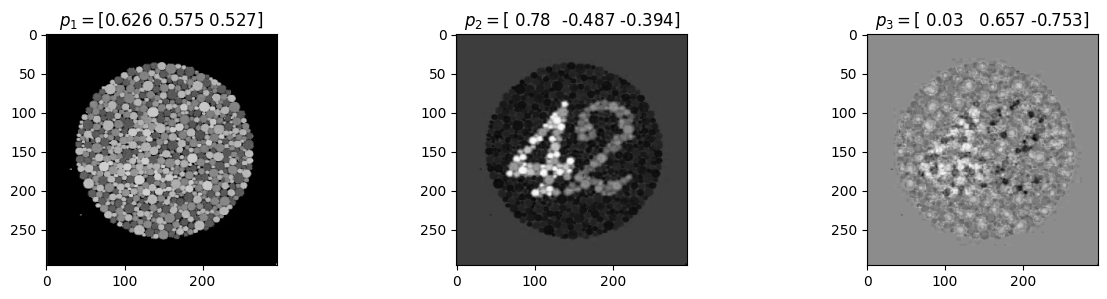

In [124]:
process_image(img_number)

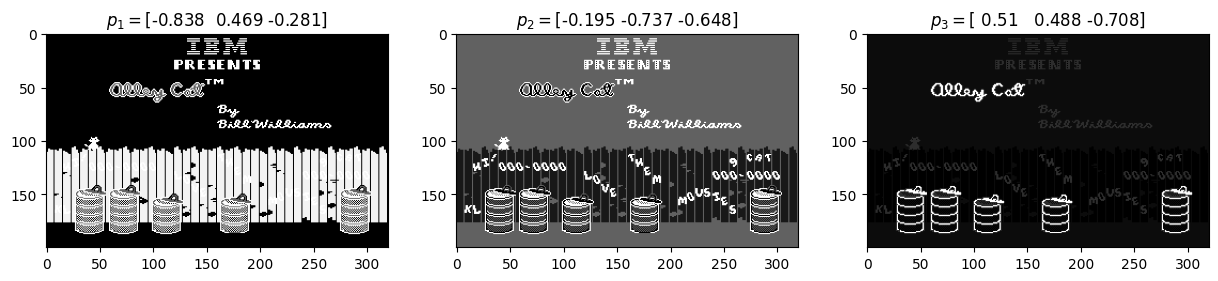

In [125]:
process_image(img_cat)

# SVD:

In [3]:
img_baboon = imageio.v2.imread('https://raw.githubusercontent.com/lorek/datasets/master/baboon.bmp',pilmode='L')

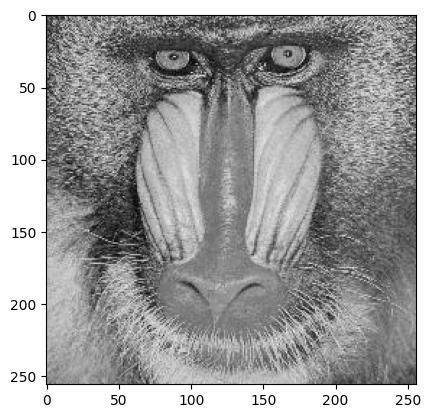

In [4]:
plt.imshow(img_baboon,cmap='gray')
plt.show()

In [5]:
U,eigenvals,VT=np.linalg.svd(img_baboon)

Lambda=np.diag(eigenvals)

In [6]:
print("img_baboon.shape = ", img_baboon.shape)
print("U.shape = ", U.shape, " eigenvals.shape = ", eigenvals.shape, ", Lambda.shape = ", Lambda.shape, ", VT.shape = ", VT.shape)


img_baboon.shape =  (256, 256)
U.shape =  (256, 256)  eigenvals.shape =  (256,) , Lambda.shape =  (256, 256) , VT.shape =  (256, 256)


In [43]:
def eigenface(U,D,VT,k): # eigenbaboon
    return np.dot(U[:,k-1:k],VT[k-1:k,:])

In [44]:
def reconstr_matrix(U,D,VT,k):
    return np.dot(U[:,:k],np.dot(D[:k,:k],VT[:k,:]))

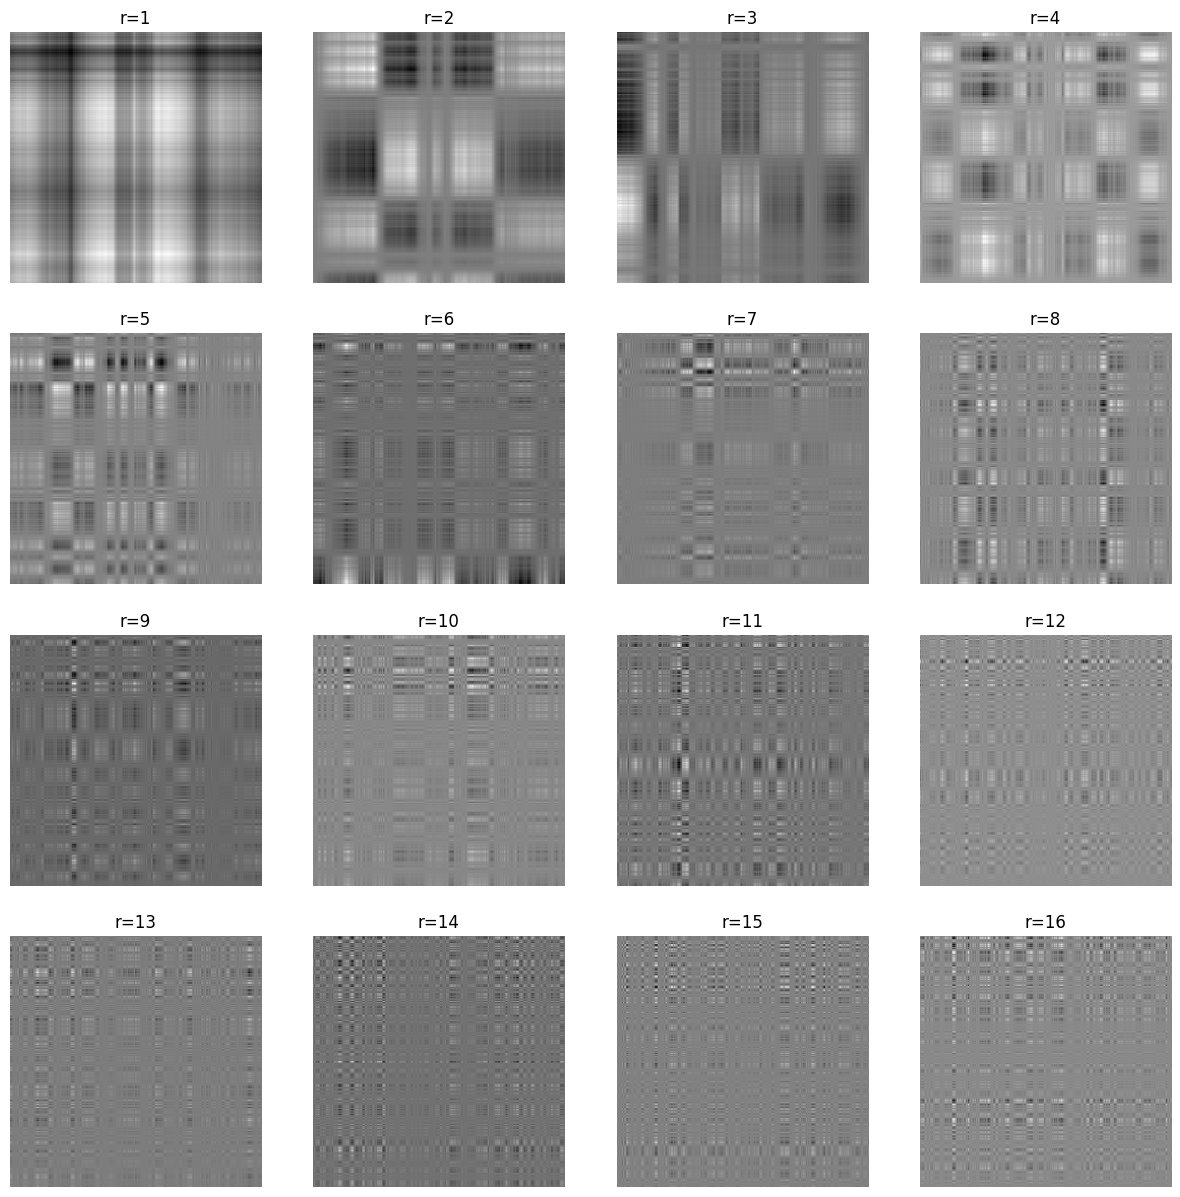

In [51]:
rows = cols = 4
how_much_rec = 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
r = 1
for r, ax in enumerate(axes.flatten(), 1):
    rr=eigenface(U,Lambda,VT,r)
    ax.imshow(rr, cmap=plt.get_cmap('gray'))
    ax.set_title(f"{r=}")
    ax.axis('off')

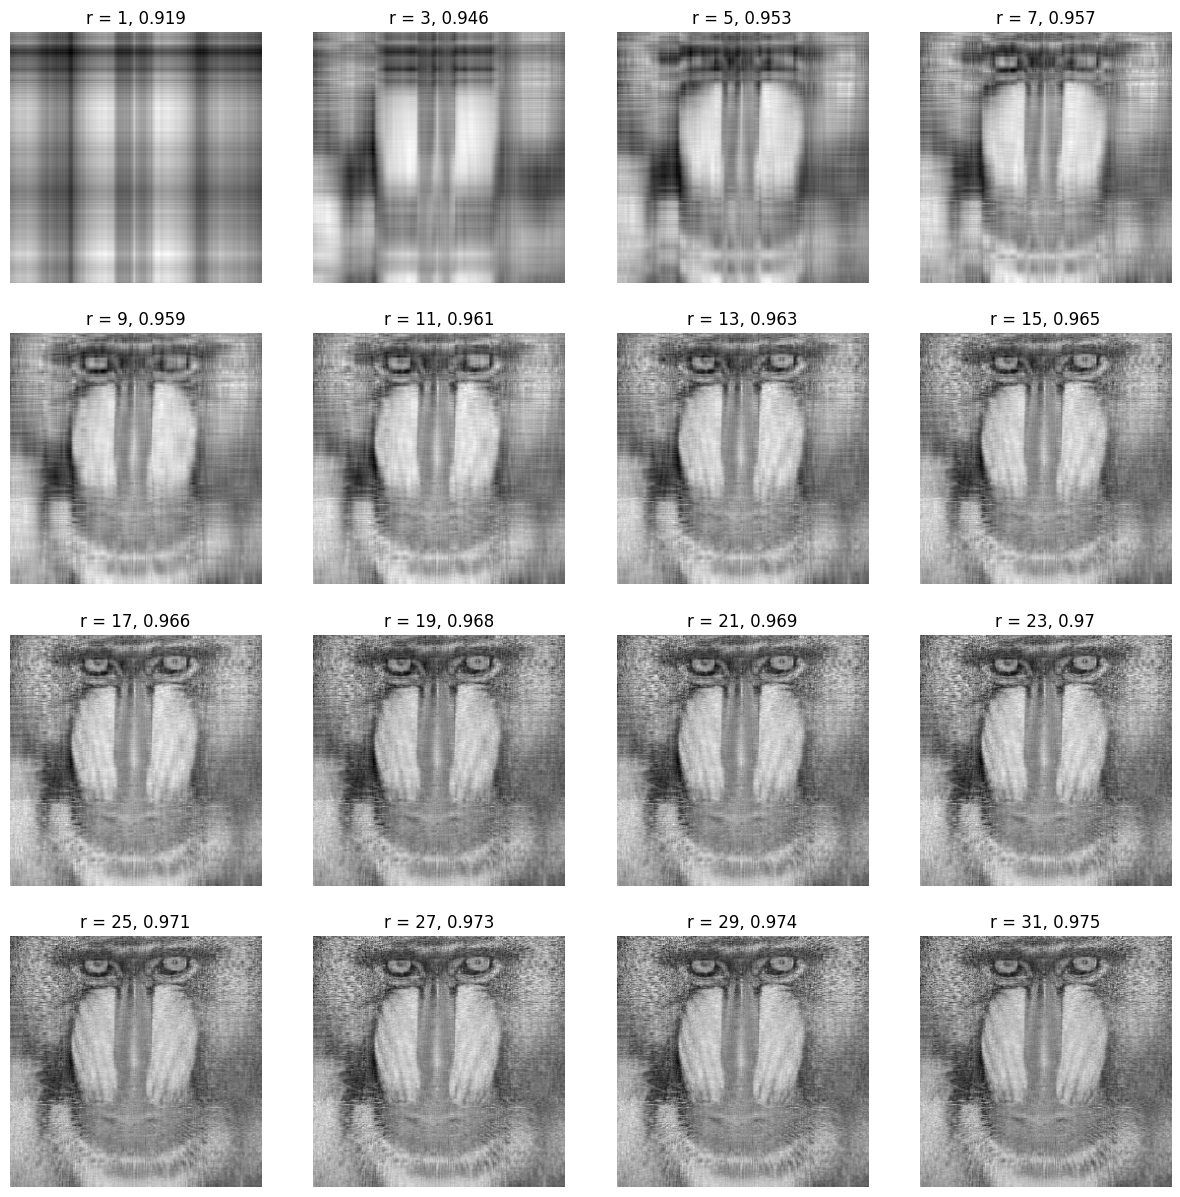

In [90]:
rows = cols = 4
how_much_rec=1
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for ax in axes.flatten():
    rr=reconstr_matrix(U,Lambda,VT,how_much_rec)
    ax.imshow(rr, cmap=plt.get_cmap('gray'))
    ax.set_title(f"r = {how_much_rec}, {np.sum(eigenvals[:how_much_rec]**2)/np.sum(eigenvals**2):.3}")
    ax.axis('off')
    how_much_rec+=2

# Q3.3
* a) In the above plot with reconstructions add the ratio $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)$ in the title of each image.
* b) make a separate 2d plot: on $x$-axis there should be $r$, on $y$-axis there should be $||\mathbf{Z}-\mathbf{Z}_r||^2$.
* c) for what $r$ do we have $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)\geq 0.95$ ?

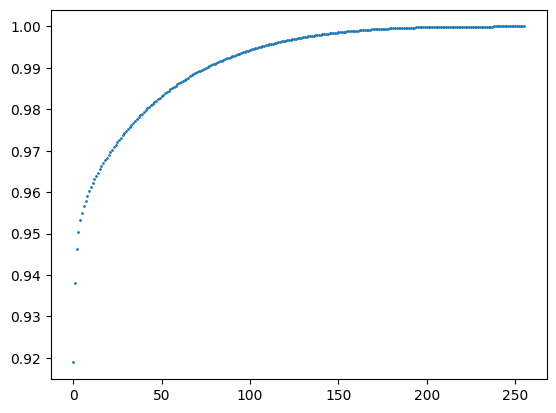

In [103]:
eigensum = np.sum(eigenvals**2)
plt.plot(np.cumsum(eigenvals**2) / eigensum, marker='o', markersize=1, linestyle="None")
plt.show()

In [93]:
np.argmax(np.cumsum(eigenvals**2) / np.sum(eigenvals**2) >= 0.95)

3

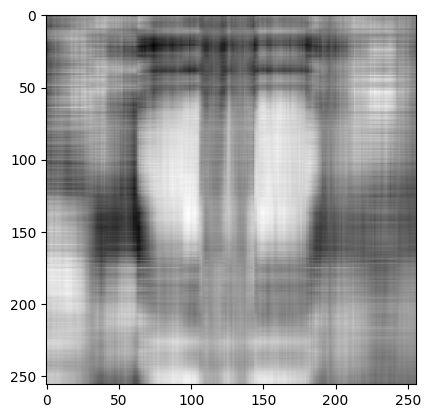

In [98]:
plt.imshow(reconstr_matrix(U, Lambda, VT, 4), cmap=plt.get_cmap('gray'))
plt.show()

In [100]:
for i in range(0, 41, 4):
    dist = np.linalg.norm(reconstr_matrix(U, Lambda, VT, i) - img_baboon)**2
    eigensum = np.sum(eigenvals[i:]**2)
    print(f"{i:3} {dist:20} {eigensum:20}")

  0   1195547252.9999998   1195547252.9999998
  4   59344253.497488506    59344253.49748847
  8    50271730.90163311     50271730.9016331
 12     45194363.9764102    45194363.97641019
 16    41222894.85093369    41222894.85093368
 20   37861416.094790846   37861416.094790846
 24    34824228.87543832    34824228.87543832
 28   32088428.585918784   32088428.585918777
 32   29551249.955093108   29551249.955093086
 36    27239438.92366646   27239438.923666455
 40   25139885.337505836    25139885.33750583
